In [1]:
import pandas as pd

# Read the data
df = pd.read_csv("../data/cleaned_311.csv")
original_df = pd.read_csv("../data/311.csv")
svi_df = pd.read_csv("../data/Climate_Ready_Boston_Social_Vulnerability.csv")

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_78344\1939778922.py:5: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("../data/311.csv")


In [2]:
original_df.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101000295613,2011-06-30 21:32:33,2011-07-14 21:32:32,2011-07-01 01:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,Street Lights,...,Greater Mattapan,7,Ward 17,1714,INTERSECTION Groveland St & River St,NaN,42.271544,-71.077221,0101000020E6100000CC4F6F30F1C451C0ADBC83F5C122...,Employee Generated
1,101000295614,2011-06-30 22:18:31,2011-07-04 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,Roslindale,10,Ward 20,2008,39 Lorraine St,2131.0,42.283850,-71.144741,0101000020E6100000C960F36E43C951C06CE46A2F5524...,Self Service
2,101000295615,2011-06-30 22:28:04,2011-08-14 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,Case Closed Case Resolved No Sidewalk and poor...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,West Roxbury,12,Ward 20,2017,INTERSECTION Corey St & Lagrange St,NaN,42.300278,-71.169805,0101000020E6100000B311E014DECA51C0A1102F826F26...,Self Service
3,101000295616,2011-06-30 23:03:48,2011-07-14 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,Case Closed Case Resolved completed,Street Light Outages,Public Works Department,Street Lights,...,Hyde Park,10,Ward 18,1816,235 Fairmount Ave,2136.0,42.249640,-71.115631,0101000020E61000003219CE7E66C751C0DDF2D930F41F...,Self Service
4,101000295617,2011-06-30 23:12:31,NaN,2011-07-01 02:12:38,ONTIME,Closed,Case Closed Case Resolved,Highway Maintenance,Public Works Department,Highway Maintenance,...,Dorchester,7,Ward 13,1309,INTERSECTION Dorchester Ave & Hallam St,NaN,42.314436,-71.056878,0101000020E6100000615079E5A3C351C0C71CEA6D3F28...,Constituent Call


In [3]:
# Add on_time column from original_df to df, by matching on case_enquiry_id
df["on_time"] = original_df["on_time"]

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,case_enquiry_id,open_dt,closed_dt,case_status,closure_reason,subject,reason,type,queue,department,city_council_district,neighborhood,neighborhood_services_district,location_zipcode,latitude,longitude,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,on_time
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,3,Greater Mattapan,7,2126,42.271544,-71.077221,Employee Generated,0.148900,2011,6,30,21,32,3,181,2,ONTIME
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,5,Roslindale,10,2131,42.283850,-71.144741,Self Service,0.162639,2011,6,30,22,18,3,181,2,ONTIME
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,6,West Roxbury,12,2132,42.300278,-71.169805,Self Service,31.537292,2011,6,30,22,28,3,181,2,ONTIME
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,5,Hyde Park,10,2136,42.249640,-71.115631,Self Service,21.548576,2011,6,30,23,3,3,181,2,OVERDUE
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,3,Dorchester,7,2125,42.314436,-71.056878,Constituent Call,0.125081,2011,6,30,23,12,3,181,2,ONTIME


In [5]:
df.columns

Index(['case_enquiry_id', 'open_dt', 'closed_dt', 'case_status',
       'closure_reason', 'subject', 'reason', 'type', 'queue', 'department',
       'city_council_district', 'neighborhood',
       'neighborhood_services_district', 'location_zipcode', 'latitude',
       'longitude', 'source', 'resolution_time', 'open_year', 'open_month',
       'open_day', 'open_hour', 'open_minute', 'open_dayofweek',
       'open_dayofyear', 'open_quarter', 'on_time'],
      dtype='object')

In [6]:
# Drop things we do not know at the time of the call
on_time_df = df.drop(columns = ["case_enquiry_id", "open_dt", "closed_dt", "case_status", "closure_reason", "resolution_time"])
on_time_df.head()

,subject,reason,type,queue,department,city_council_district,neighborhood,neighborhood_services_district,location_zipcode,latitude,longitude,source,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,on_time
0,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,3,Greater Mattapan,7,2126,42.271544,-71.077221,Employee Generated,2011,6,30,21,32,3,181,2,ONTIME
1,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,5,Roslindale,10,2131,42.283850,-71.144741,Self Service,2011,6,30,22,18,3,181,2,ONTIME
2,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,6,West Roxbury,12,2132,42.300278,-71.169805,Self Service,2011,6,30,22,28,3,181,2,ONTIME
3,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,5,Hyde Park,10,2136,42.249640,-71.115631,Self Service,2011,6,30,23,3,3,181,2,OVERDUE
4,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,3,Dorchester,7,2125,42.314436,-71.056878,Constituent Call,2011,6,30,23,12,3,181,2,ONTIME


In [7]:
on_time_df.isnull().sum()

subject                               0
reason                                0
type                                  0
queue                                 0
department                            0
city_council_district                 0
neighborhood                          0
neighborhood_services_district        0
location_zipcode                      0
latitude                          44020
longitude                         44020
source                                0
open_year                             0
open_month                            0
open_day                              0
open_hour                             0
open_minute                           0
open_dayofweek                        0
open_dayofyear                        0
open_quarter                          0
on_time                             671
dtype: int64

In [8]:
# Turn zipcode into a string and make sure it is 5 digits
on_time_df['location_zipcode'] = on_time_df['location_zipcode'].astype(str).str.zfill(5)
on_time_df.head()

,subject,reason,type,queue,department,city_council_district,neighborhood,neighborhood_services_district,location_zipcode,latitude,longitude,source,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,on_time
0,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,3,Greater Mattapan,7,02126,42.271544,-71.077221,Employee Generated,2011,6,30,21,32,3,181,2,ONTIME
1,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,5,Roslindale,10,02131,42.283850,-71.144741,Self Service,2011,6,30,22,18,3,181,2,ONTIME
2,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,6,West Roxbury,12,02132,42.300278,-71.169805,Self Service,2011,6,30,22,28,3,181,2,ONTIME
3,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,5,Hyde Park,10,02136,42.249640,-71.115631,Self Service,2011,6,30,23,3,3,181,2,OVERDUE
4,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,3,Dorchester,7,02125,42.314436,-71.056878,Constituent Call,2011,6,30,23,12,3,181,2,ONTIME


In [9]:
# Drop rows with missing data
on_time_df = on_time_df.dropna()
on_time_df.isnull().sum()

subject                           0
reason                            0
type                              0
queue                             0
department                        0
city_council_district             0
neighborhood                      0
neighborhood_services_district    0
location_zipcode                  0
latitude                          0
longitude                         0
source                            0
open_year                         0
open_month                        0
open_day                          0
open_hour                         0
open_minute                       0
open_dayofweek                    0
open_dayofyear                    0
open_quarter                      0
on_time                           0
dtype: int64

In [10]:
on_time_df.head()

,subject,reason,type,queue,department,city_council_district,neighborhood,neighborhood_services_district,location_zipcode,latitude,longitude,source,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,on_time
0,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,3,Greater Mattapan,7,02126,42.271544,-71.077221,Employee Generated,2011,6,30,21,32,3,181,2,ONTIME
1,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,5,Roslindale,10,02131,42.283850,-71.144741,Self Service,2011,6,30,22,18,3,181,2,ONTIME
2,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,6,West Roxbury,12,02132,42.300278,-71.169805,Self Service,2011,6,30,22,28,3,181,2,ONTIME
3,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,5,Hyde Park,10,02136,42.249640,-71.115631,Self Service,2011,6,30,23,3,3,181,2,OVERDUE
4,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,3,Dorchester,7,02125,42.314436,-71.056878,Constituent Call,2011,6,30,23,12,3,181,2,ONTIME


In [11]:
# on_time_df['location_zipcode'].value_counts()
# Count 00000 zipcodes
on_time_df[on_time_df['location_zipcode'] == '00000'].count()

# Drop 00000 zipcodes
on_time_df = on_time_df[on_time_df['location_zipcode'] != '00000']

In [12]:
on_time_df.shape

(2659698, 21)

In [13]:
# Change 1: ONTIME to 1, OVERDUE to 0
on_time_df['on_time'] = on_time_df['on_time'].replace(['ONTIME', 'OVERDUE'], [1, 0])
on_time_df.head()

,subject,reason,type,queue,department,city_council_district,neighborhood,neighborhood_services_district,location_zipcode,latitude,longitude,source,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,on_time
0,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,3,Greater Mattapan,7,02126,42.271544,-71.077221,Employee Generated,2011,6,30,21,32,3,181,2,1
1,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,5,Roslindale,10,02131,42.283850,-71.144741,Self Service,2011,6,30,22,18,3,181,2,1
2,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,6,West Roxbury,12,02132,42.300278,-71.169805,Self Service,2011,6,30,22,28,3,181,2,1
3,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,5,Hyde Park,10,02136,42.249640,-71.115631,Self Service,2011,6,30,23,3,3,181,2,0
4,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,3,Dorchester,7,02125,42.314436,-71.056878,Constituent Call,2011,6,30,23,12,3,181,2,1


In [14]:
# List of categorical variables to one hot encode
categorical = ["subject", "reason", "type", "queue", "department", "city_council_district", "neighborhood", "neighborhood_services_district", "location_zipcode", "source"]

original_shape = on_time_df.shape

# Calculating the increase in columns due to one-hot encoding
additional_columns = 0
for column in categorical:
    unique_values = on_time_df[column].nunique()
    additional_columns += unique_values
    print(f"{column} has {unique_values} unique values.")

# Total number of columns after one-hot encoding
new_column_count = original_shape[1] + additional_columns

print(f"Original number of columns: {original_shape[1]}")
print(f"Additional columns after one-hot encoding: {additional_columns}")
print(f"Total number of columns after one-hot encoding: {new_column_count}")


subject has 12 unique values.
reason has 52 unique values.
type has 208 unique values.
queue has 181 unique values.
department has 19 unique values.
city_council_district has 11 unique values.
neighborhood has 24 unique values.
neighborhood_services_district has 17 unique values.
location_zipcode has 84 unique values.
source has 7 unique values.
Original number of columns: 21
Additional columns after one-hot encoding: 615
Total number of columns after one-hot encoding: 636


In [15]:
# One-hot encode the categorical variables
on_time_df = pd.get_dummies(on_time_df, columns = categorical)
on_time_df.head()

,latitude,longitude,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,on_time,subject_Animal Control,subject_Boston Police Department,subject_Boston Water & Sewer Commission,subject_Consumer Affairs & Licensing,subject_Disability Department,subject_Inspectional Services,subject_Mayor's 24 Hour Hotline,subject_Neighborhood Services,subject_Parks & Recreation Department,subject_Property Management,subject_Public Works Department,subject_Transportation - Traffic Division,reason_Abandoned Bicycle,reason_Administrative,reason_Administrative & General Requests,reason_Air Pollution Control,reason_Alert Boston,reason_Animal Issues,reason_Billing,reason_Boston Bikes,reason_Bridge Maintenance,reason_Building,reason_Call Center Intake,reason_Catchbasin,reason_Cemetery,reason_Code Enforcement,reason_Consumer Affairs Issues,reason_Current Events,reason_Disability,reason_Employee & General Comments,reason_Enforcement & Abandoned Vehicles,reason_Environmental Services,reason_Fire Department,reason_Fire Hydrant,reason_General Request,reason_Generic Noise Disturbance,reason_Graffiti,reason_Health,reason_Highway Maintenance,reason_Housing,reason_MBTA,reason_Massport,reason_Needle Program,reason_Neighborhood Services Issues,reason_Noise Disturbance,reason_Notification,reason_Office of The Parking Clerk,reason_Operations,reason_Park Maintenance & Safety,reason_Parking Complaints,reason_Pothole,reason_Programs,reason_Recycling,reason_Sanitation,reason_Sidewalk Cover / Manhole,reason_Signs & Signals,reason_Street Cleaning,reason_Street Lights,reason_Traffic Management & Engineering,reason_Trees,reason_Valet,reason_Volunteer & Corporate Groups,reason_Water Issues,reason_Weights and Measures,type_ADA,type_Abandoned Bicycle,type_Abandoned Building,type_Abandoned Vehicles,type_Abandoned Vehicles - Private Tow,type_Aircraft Noise Disturbance,type_Alert Boston,type_Animal Found,type_Animal Generic Request,type_Animal Lost,type_Animal Noise Disturbances,type_Automotive Noise Disturbance,type_BWSC General Request,type_BWSC Pothole,type_Base Repair (Internal),type_Bed Bugs,type_Bicycle Issues,type_Big Buildings Online Request,type_Big Buildings Recycling (INTERNAL),type_Big Buildings Resident Complaint,type_Billing Complaint,type_Boston Public Health Commission (BPHC),type_Breathe Easy,type_Bridge Maintenance,type_Building Inspection Request,type_CE Collection,type_Call Log,type_Capital Improvement Long Term,type_Carbon Monoxide,type_Catchbasin,type_Cemetery Maintenance Request,type_Chronic Dampness/Mold,type_City/State Snow Issues,type_Construction Debris,type_Contractor Complaints,type_Contractors Complaint,type_Corporate or Community Group Service Day Clean Up,type_Cross Metering - Sub-Metering,type_Downed Wire,type_Dumpster & Loading Noise Disturbances,type_Egress,type_Electrical,type_Empty Litter Basket,type_Equipment Repair,type_Exceeding Terms of Permit,type_Fire Department Request,type_Fire Hydrant,type_Fire in Food Establishment,type_Flooding Residential/Commercial,type_Follow-Up,type_Food Alert - Confirmed,type_Food Alert - Unconfirmed,type_General Comments For An Employee,type_General Comments For a Program or Policy,type_General Lighting Request,type_General Traffic Engineering Request,type_Graffiti Removal,type_Ground Maintenance,type_HP Sign Application New,type_HP Sign Application Renewal,type_Heat - Excessive Insufficient,type_Heat/Fuel Assistance,type_Highway Maintenance,type_Illegal Auto Body Shop,type_Illegal Dumping,type_Illegal Occupancy,type_Illegal Posting of Signs,type_Illegal Rooming House,type_Illegal Use,type_Illegal Vending,type_Improper Storage of Trash (Barrels),type_Install New Lighting,type_Item Price Missing,type_Knockdown Replacement,type_Lead,type_Litter Basket Maintenance,type_Loud Parties/Music/People,type_MBTA Request,type_Maintenance - Homeowner,type_Maintenance Complaint - Residential,type_Major System Failure,type_Mattress_Pickup,type_Mechanical,type_Mice Infestation - Res

In [16]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ["latitude", "longitude", "open_year", "open_month", "open_day", "open_hour", "open_minute", "open_dayofweek", "open_dayofyear", "open_quarter"]

# Scale the data
scaler = MinMaxScaler()
on_time_df[columns_to_scale] = scaler.fit_transform(on_time_df[columns_to_scale])

on_time_df.head()

,latitude,longitude,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,on_time,subject_Animal Control,subject_Boston Police Department,subject_Boston Water & Sewer Commission,subject_Consumer Affairs & Licensing,subject_Disability Department,subject_Inspectional Services,subject_Mayor's 24 Hour Hotline,subject_Neighborhood Services,subject_Parks & Recreation Department,subject_Property Management,subject_Public Works Department,subject_Transportation - Traffic Division,reason_Abandoned Bicycle,reason_Administrative,reason_Administrative & General Requests,reason_Air Pollution Control,reason_Alert Boston,reason_Animal Issues,reason_Billing,reason_Boston Bikes,reason_Bridge Maintenance,reason_Building,reason_Call Center Intake,reason_Catchbasin,reason_Cemetery,reason_Code Enforcement,reason_Consumer Affairs Issues,reason_Current Events,reason_Disability,reason_Employee & General Comments,reason_Enforcement & Abandoned Vehicles,reason_Environmental Services,reason_Fire Department,reason_Fire Hydrant,reason_General Request,reason_Generic Noise Disturbance,reason_Graffiti,reason_Health,reason_Highway Maintenance,reason_Housing,reason_MBTA,reason_Massport,reason_Needle Program,reason_Neighborhood Services Issues,reason_Noise Disturbance,reason_Notification,reason_Office of The Parking Clerk,reason_Operations,reason_Park Maintenance & Safety,reason_Parking Complaints,reason_Pothole,reason_Programs,reason_Recycling,reason_Sanitation,reason_Sidewalk Cover / Manhole,reason_Signs & Signals,reason_Street Cleaning,reason_Street Lights,reason_Traffic Management & Engineering,reason_Trees,reason_Valet,reason_Volunteer & Corporate Groups,reason_Water Issues,reason_Weights and Measures,type_ADA,type_Abandoned Bicycle,type_Abandoned Building,type_Abandoned Vehicles,type_Abandoned Vehicles - Private Tow,type_Aircraft Noise Disturbance,type_Alert Boston,type_Animal Found,type_Animal Generic Request,type_Animal Lost,type_Animal Noise Disturbances,type_Automotive Noise Disturbance,type_BWSC General Request,type_BWSC Pothole,type_Base Repair (Internal),type_Bed Bugs,type_Bicycle Issues,type_Big Buildings Online Request,type_Big Buildings Recycling (INTERNAL),type_Big Buildings Resident Complaint,type_Billing Complaint,type_Boston Public Health Commission (BPHC),type_Breathe Easy,type_Bridge Maintenance,type_Building Inspection Request,type_CE Collection,type_Call Log,type_Capital Improvement Long Term,type_Carbon Monoxide,type_Catchbasin,type_Cemetery Maintenance Request,type_Chronic Dampness/Mold,type_City/State Snow Issues,type_Construction Debris,type_Contractor Complaints,type_Contractors Complaint,type_Corporate or Community Group Service Day Clean Up,type_Cross Metering - Sub-Metering,type_Downed Wire,type_Dumpster & Loading Noise Disturbances,type_Egress,type_Electrical,type_Empty Litter Basket,type_Equipment Repair,type_Exceeding Terms of Permit,type_Fire Department Request,type_Fire Hydrant,type_Fire in Food Establishment,type_Flooding Residential/Commercial,type_Follow-Up,type_Food Alert - Confirmed,type_Food Alert - Unconfirmed,type_General Comments For An Employee,type_General Comments For a Program or Policy,type_General Lighting Request,type_General Traffic Engineering Request,type_Graffiti Removal,type_Ground Maintenance,type_HP Sign Application New,type_HP Sign Application Renewal,type_Heat - Excessive Insufficient,type_Heat/Fuel Assistance,type_Highway Maintenance,type_Illegal Auto Body Shop,type_Illegal Dumping,type_Illegal Occupancy,type_Illegal Posting of Signs,type_Illegal Rooming House,type_Illegal Use,type_Illegal Vending,type_Improper Storage of Trash (Barrels),type_Install New Lighting,type_Item Price Missing,type_Knockdown Replacement,type_Lead,type_Litter Basket Maintenance,type_Loud Parties/Music/People,type_MBTA Request,type_Maintenance - Homeowner,type_Maintenance Complaint - Residential,type_Major System Failure,type_Mattress_Pickup,type_Mechanical,type_Mice Infestation - Res

In [17]:
from sklearn.model_selection import train_test_split

df_sampled = on_time_df.sample(frac=0.01, random_state=42)

# Assuming 'on_time' is your target variable
X = df_sampled.drop('on_time', axis=1)
y = df_sampled['on_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# SVC
model = RandomForestClassifier(n_estimators=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

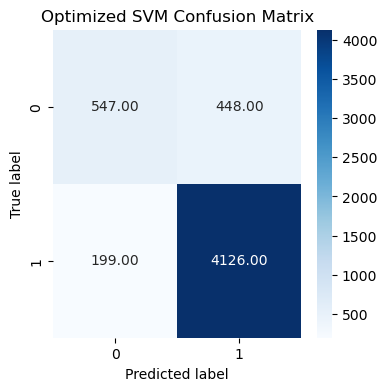

              precision    recall  f1-score   support

           0       0.73      0.55      0.63       995
           1       0.90      0.95      0.93      4325

    accuracy                           0.88      5320
   macro avg       0.82      0.75      0.78      5320
weighted avg       0.87      0.88      0.87      5320

Accuracy: 0.8783834586466165


In [19]:
# plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f', cmap='Blues')
plt.title('Optimized SVM Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))
# print accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

In [20]:
# Assuming 'on_time_df' is your original dataframe
# Create a new subset with the remaining 95% of the data
df_remainder = on_time_df.drop(df_sampled.index)

# Split the data into features and target variable
X_remainder = df_remainder.drop('on_time', axis=1)
y_remainder = df_remainder['on_time']

# Use the trained model to make predictions on the new data
y_pred_remainder = model.predict(X_remainder)

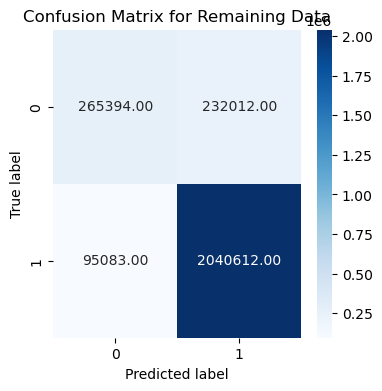

              precision    recall  f1-score   support

           0       0.74      0.53      0.62    497406
           1       0.90      0.96      0.93   2135695

    accuracy                           0.88   2633101
   macro avg       0.82      0.74      0.77   2633101
weighted avg       0.87      0.88      0.87   2633101

Accuracy on remaining data: 0.8757757488223961


In [21]:
# Evaluate the model
# Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_remainder, y_pred_remainder), annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix for Remaining Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print the classification report
print(classification_report(y_remainder, y_pred_remainder))
# Print the accuracy
print('Accuracy on remaining data:', accuracy_score(y_remainder, y_pred_remainder))

In [23]:
import numpy as np

# Get the feature importances
importances = model.feature_importances_

# Get the index of importances from greatest importance to least
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_importances.sort_values(by='importance', ascending=False).head(20)

,importance
open_year,0.054543
open_dayofyear,0.048790
latitude,0.046312
longitude,0.045708
open_minute,0.042299
open_day,0.040867
open_hour,0.038224
open_month,0.032426
open_dayofweek,0.029988
open_quarter,0.018289
